In [39]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('H:/MachineLearning/PolynomialRegression/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values



In [40]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [41]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [42]:
#Linear + Polynomial Regression
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X)

In [44]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [45]:
pr=LinearRegression()
pr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

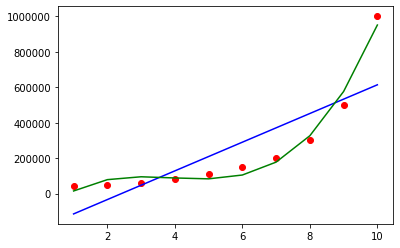

In [46]:
plt.scatter(X,y,color='red')
plt.plot(X,ln.predict(X),color='blue')
plt.plot(X,pr.predict(X_poly),color='green')
plt.show()


In [48]:
ln.predict(np.array([6.5]).reshape(1, 1))

array([330378.78787879])

In [51]:
pr.predict(poly_reg.fit_transform(np.array([6.5]).reshape(1, 1)))

array([133259.46969697])

In [52]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [56]:
tree_regressor.predict(np.array([[6.5]]))

array([150000.])

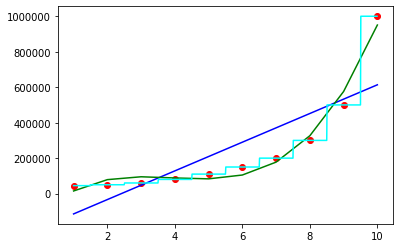

In [60]:
X_grid=np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X,y,color='red')
plt.plot(X,ln.predict(X),color='blue')
plt.plot(X,pr.predict(X_poly),color='green')
plt.plot(X_grid,tree_regressor.predict(X_grid),color='cyan')

plt.show()



In [69]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

randreg10=RandomForestRegressor(n_estimators=10,random_state=0)
randreg10.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [70]:
randreg10.predict(np.array([[6.5]]))

array([167000.])

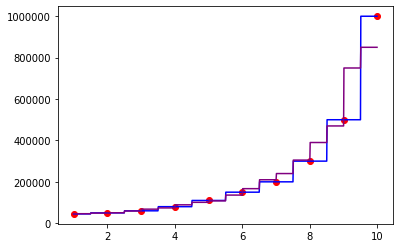

In [71]:
plt.scatter(X,y,color='red')
plt.plot(X_grid,tree_regressor.predict(X_grid),color='blue')
plt.plot(X_grid,randreg10.predict(X_grid),color='purple')

plt.show()

In [66]:
randreg=RandomForestRegressor(n_estimators=100,random_state=0)
randreg.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [67]:
randreg.predict(np.array([[6.5]]))

array([158300.])

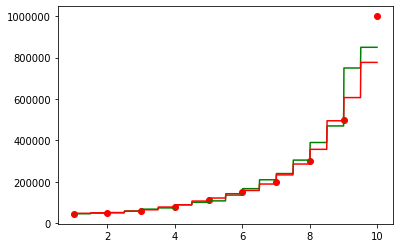

In [72]:
plt.scatter(X,y,color='red')
plt.plot(X_grid,randreg10.predict(X_grid),color='green')
plt.plot(X_grid,randreg.predict(X_grid),color='red')

plt.show()